In [14]:
# %% Cell 1: Import Libraries and Configure Environment
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configure matplotlib and seaborn
%matplotlib inline
sns.set(style="whitegrid")

In [15]:
df = pd.read_csv('/Users/shivansh420/Desktop/MMDP-2_Dataset/Task-1/Task-E/Region-wise Number of Heatwaves Days Observed Over Indian Region from 2022 to 2024.csv', skipinitialspace=True)
df.head()


,Sl. No.,Region-wise,2022,2023,2024
0,1,Assam and Meghalaya,0,0,1
1,2,N M M T,0,0,0
2,3,Sub-Himalayan West Bengal and Sikkim,1,15,11
3,4,Gangetic West Bengal,8,27,31
4,5,Odisha,11,24,37


In [16]:
# %% Cell 3: Data Pre-processing
# Print dataset info and summary
print(df.info())
print(df.describe())

# Remove the overall total row (if present)
df_regions = df[df['Region-wise'] != 'All Total Heatwave Days'].copy()

# Reset index for easier handling
df_regions.reset_index(drop=True, inplace=True)
df_regions.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sl. No.      34 non-null     object
 1   Region-wise  34 non-null     object
 2   2022         34 non-null     int64 
 3   2023         34 non-null     int64 
 4   2024         34 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB
None
             2022        2023        2024
count   34.000000   34.000000   34.000000
mean    27.470588   13.529412   32.588235
std     79.253041   39.189698   92.701580
min      0.000000    0.000000    0.000000
25%      0.000000    0.000000   10.250000
50%      9.500000    3.500000   15.000000
75%     27.750000   12.750000   26.750000
max    467.000000  230.000000  554.000000


,Sl. No.,Region-wise,2022,2023,2024
0,1,Assam and Meghalaya,0,0,1
1,2,N M M T,0,0,0
2,3,Sub-Himalayan West Bengal and Sikkim,1,15,11
3,4,Gangetic West Bengal,8,27,31
4,5,Odisha,11,24,37


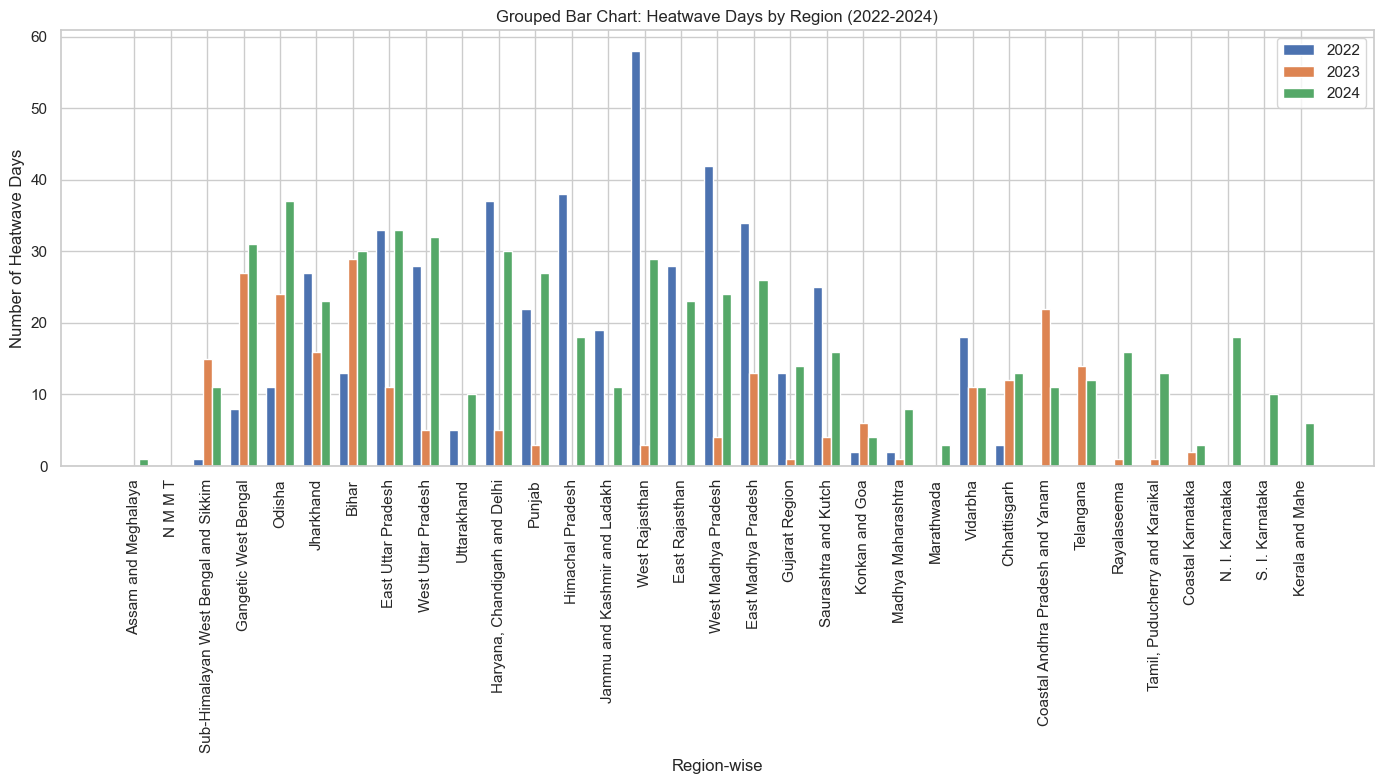

In [17]:
# %% Cell 4: Grouped Bar Chart of Heatwave Days by Region and Year
bar_width = 0.25
indices = np.arange(len(df_regions))

plt.figure(figsize=(14,8))
plt.bar(indices, df_regions['2022'], bar_width, label='2022')
plt.bar(indices + bar_width, df_regions['2023'], bar_width, label='2023')
plt.bar(indices + 2 * bar_width, df_regions['2024'], bar_width, label='2024')

plt.xlabel('Region-wise')
plt.ylabel('Number of Heatwave Days')
plt.title('Grouped Bar Chart: Heatwave Days by Region (2022-2024)')
plt.xticks(indices + bar_width, df_regions['Region-wise'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


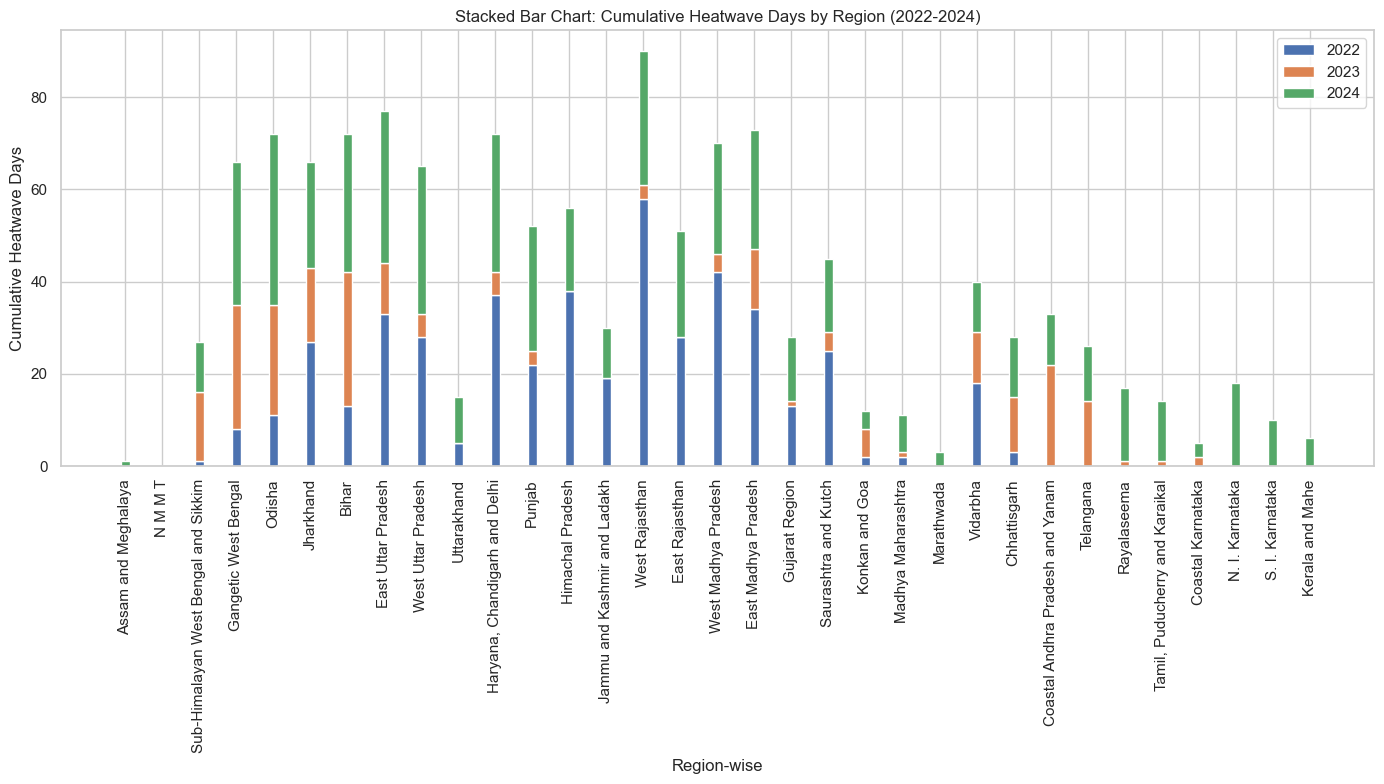

In [18]:
# %% Cell 5: Stacked Bar Chart of Cumulative Heatwave Days
plt.figure(figsize=(14,8))
plt.bar(indices, df_regions['2022'], bar_width, label='2022')
plt.bar(indices, df_regions['2023'], bar_width, bottom=df_regions['2022'], label='2023')
plt.bar(indices, df_regions['2024'], bar_width, bottom=df_regions['2022'] + df_regions['2023'], label='2024')

plt.xlabel('Region-wise')
plt.ylabel('Cumulative Heatwave Days')
plt.title('Stacked Bar Chart: Cumulative Heatwave Days by Region (2022-2024)')
plt.xticks(indices, df_regions['Region-wise'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


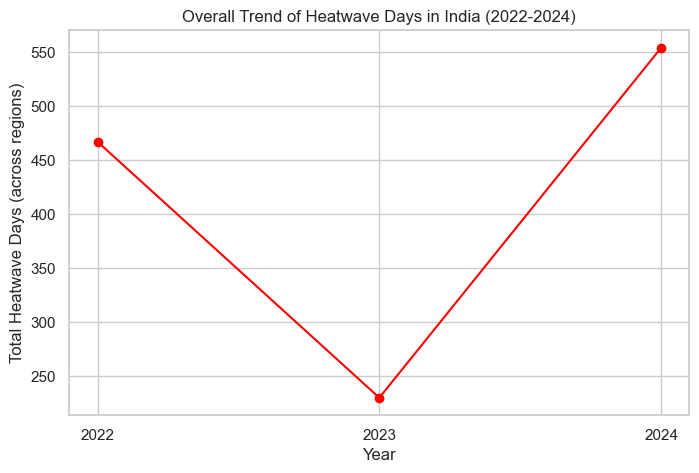

In [19]:
# %% Cell 6: Overall Trend Line Chart
overall_totals = df_regions[['2022', '2023', '2024']].sum()
plt.figure(figsize=(8,5))
plt.plot(['2022', '2023', '2024'], overall_totals, marker='o', linestyle='-', color='red')
plt.xlabel('Year')
plt.ylabel('Total Heatwave Days (across regions)')
plt.title('Overall Trend of Heatwave Days in India (2022-2024)')
plt.grid(True)
plt.show()


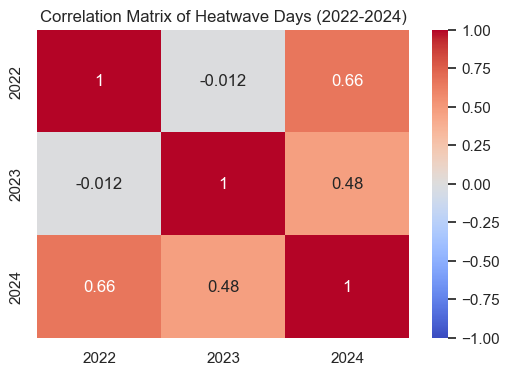

In [20]:
# %% Cell 7: Correlation Matrix Heatmap
corr_matrix = df_regions[['2022', '2023', '2024']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Heatwave Days (2022-2024)')
plt.show()


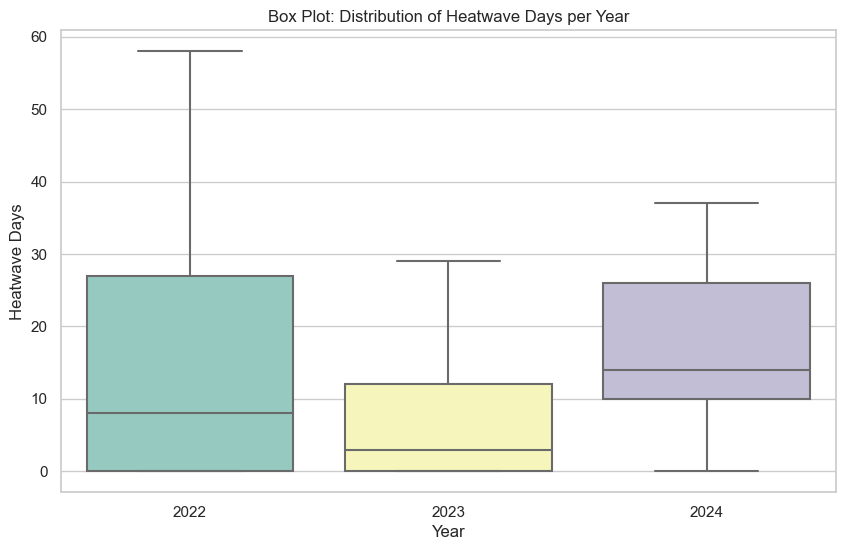

In [21]:
# %% Cell 8: Box Plot of Heatwave Days per Year
df_melted = df_regions.melt(id_vars=['Region-wise'], value_vars=['2022', '2023', '2024'], 
                            var_name='Year', value_name='Heatwave Days')
plt.figure(figsize=(10,6))
sns.boxplot(x='Year', y='Heatwave Days', data=df_melted, palette='Set3')
plt.title('Box Plot: Distribution of Heatwave Days per Year')
plt.show()


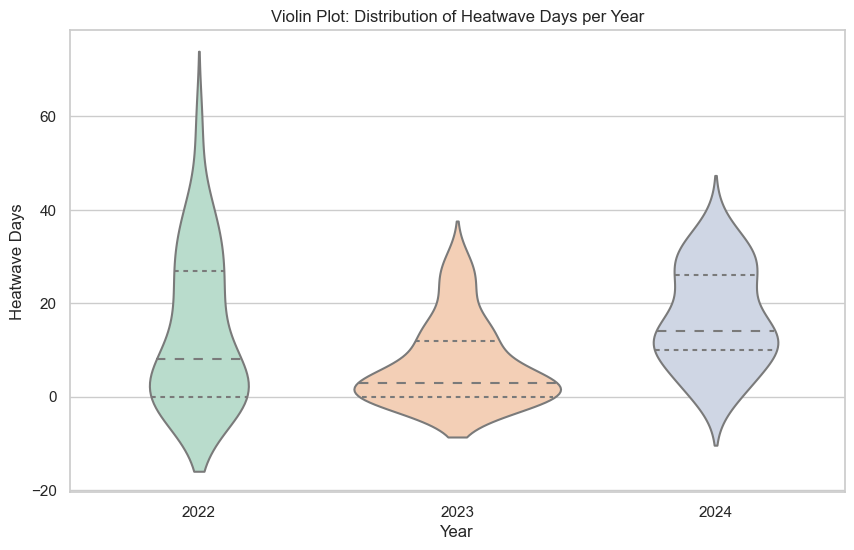

In [22]:
# %% Cell 9: Violin Plot of Heatwave Days Distribution
plt.figure(figsize=(10,6))
sns.violinplot(x='Year', y='Heatwave Days', data=df_melted, inner='quartile', palette='Pastel2')
plt.title('Violin Plot: Distribution of Heatwave Days per Year')
plt.show()


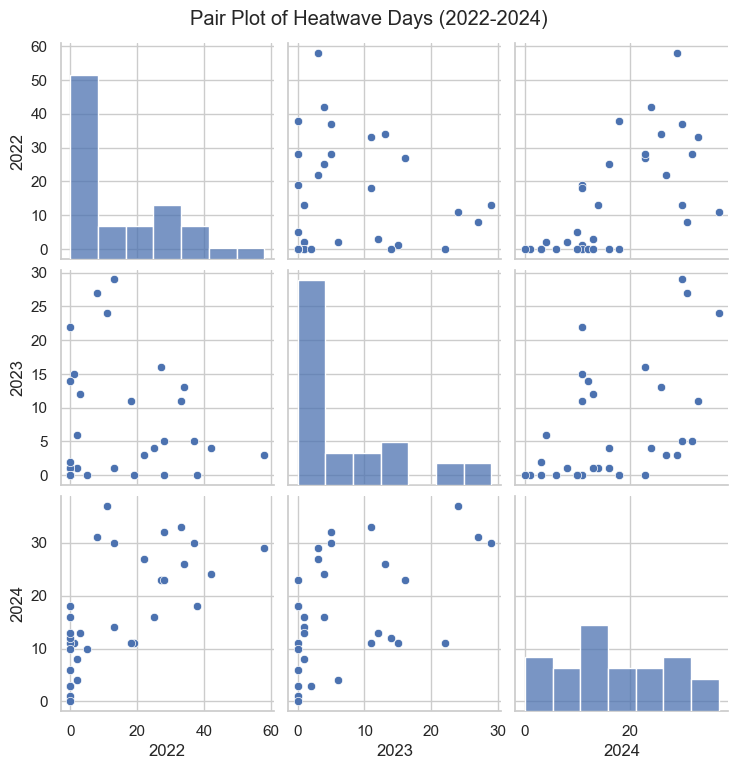

In [23]:
# %% Cell 10: Pair Plot to Visualize Pairwise Relationships
sns.pairplot(df_regions[['2022', '2023', '2024']])
plt.suptitle('Pair Plot of Heatwave Days (2022-2024)', y=1.02)
plt.show()


In [24]:
# %% Cell 11: Interactive Plotly Grouped Bar Chart
fig = px.bar(df_regions, 
             x='Region-wise', 
             y=['2022', '2023', '2024'], 
             barmode='group', 
             title='Interactive Grouped Bar Chart: Heatwave Days by Region (2022-2024)')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [25]:
# %% Cell 12: Interactive Plotly Line Chart of Overall Trend
overall_df = pd.DataFrame({
    'Year': ['2022', '2023', '2024'],
    'Total Heatwave Days': df_regions[['2022', '2023', '2024']].sum()
})
fig2 = px.line(overall_df, x='Year', y='Total Heatwave Days', markers=True, 
               title='Interactive Line Chart: Overall Heatwave Trend (2022-2024)')
fig2.show()


# Cell 13: Analysis Summary and Observations

### Observations

1. **Common Proportions and Trends:**
   - The grouped bar chart shows that most regions have relatively low heatwave day counts, with a few regions (e.g., some areas in West and East Uttar Pradesh, West Rajasthan) showing significantly higher numbers.
   - The stacked bar chart reinforces this observation, highlighting how a small subset of regions contributes most of the cumulative heatwave days.

2. **Overall Trend:**
   - The interactive line chart of overall heatwave days (summing over regions) reveals the national-level trend across 2022, 2023, and 2024. This could be further analyzed to understand seasonal patterns or impacts of specific climatic events.

3. **Distribution Patterns:**
   - Box plots and violin plots show the spread and distribution of heatwave days per year. Outliers and differences in median values between years may indicate unusual events or changes in reporting methods.
   - The pair plot suggests a strong correlation between the heatwave days across the three years, meaning regions with higher values in one year tend to have higher values in others.

4. **Interactive Exploration:**
   - Interactive Plotly charts allow for dynamic exploration. Users can hover over regions to see exact values and better identify clusters or outliers.

### New Insights

- **Regional Outliers:**
  - Certain regions stand out as outliers with significantly higher heatwave days. Investigating the reasons behind these could provide insights into local climatic conditions or urban heat island effects.
  
 **Correlation and Consistency:**
  - The strong pairwise correlations across years imply that heatwave occurrences are consistent over time in many regions. This could be useful for modeling and predicting future heatwave events.
  
- **Data Variability:**
  - The variability in the distributions (as shown by the box and violin plots) suggests that while some regions experience steady conditions, others may be subject to more erratic weather patterns, possibly due to geographic or socio-economic factors.

These plots and observations form a robust foundation for understanding and further exploring heatwave patterns in Indian regions.
